# Predicting medical procedure outcomes 

## Introduction

In this project we will implement a binary classification model that could predict the success/failure outcome of a medical procedure given the attributes of the procedure. 

The Center for Medicare and Medicaid Services (CMS) has collected a fair volume of data - we're not entirely sure how much - on medical procedures conducted at hospitals under their supervision.This data includes attributes of the procedure.

The data dictionary provided with data is as follows:
- procedure_id : Unique identifier of each procedure
- type_of_procedure : Name of the procedure
- length_of_procedure_min : The mins procedure was carried out
- severity_of_condition : How sevear the contion is
- severity_post_procedure_complications : How severe are the post procedure complications 
- pain : How severe is the pain
- recurrence_of_original_condition : Did the original condition recurre after the procedure	
- age : Age of the patient
- gender : Gender of the patient
- cost : Cost for the procedure

## Creating a Dataset

In [1]:
# Import the pandas NumPy and random libraries
import numpy as np
import pandas as pd
import random

In [2]:
# creat a dataset 
cols = ['procedure_id','type_of_procedure', 'length_of_procedure_min', 
           'severity_of_condition', 'severity_post_procedure_complications',
           'pain', 'recurrence_of_original_condition', 'age', 'gender', 'cost', 'outcome']
lst = []
for i in range(100):
    lst.append(['',random.choice(["Appendectomy","C-Section","Heart Valve surgery","Epilepsy Surgery",
                                   "Heart Bypass Surgery","Hip Replacement Surgery","Joint Fusion Surgery",
                                   "Liver Transplant","Weight Loss Surgery","Hernia Surgery","Rotator cuff surgery",
                                   "Congenital heart defect Surgery","Bone Marrow Aspiration","Chemotherapy"]),
                   random.randint(1, 1440), 
                   random.randint(0, 5), 
                   random.randint(0,5),
                   random.randint(0,5), 
                   random.randint(0, 1), 
                   random.randint(0,100), 
                   random.choice(["Male","Female"]),
                   random.randint(0,100000),
                   random.randint(0, 1)
                   ])
    
#Define the dataframe
dfProcedures = pd.DataFrame(lst, columns=cols)

# Define a function to create procedure_id for type_of_procedure(could'nt create in more efficent way due to time constraint)
def procid(val):
    if val == "Appendectomy":
        proc_id = 1
    elif val == "C-Section":
        proc_id = 2
    elif val == "Heart Valve surgery":
        proc_id = 3
    elif val == "Epilepsy Surgery":
        proc_id = 4
    elif val == "Heart Bypass Surgery":
        proc_id = 5
    elif val == "Hip Replacement Surgery":
        proc_id = 6
    elif val == "Joint Fusion Surgery":
        proc_id = 7
    elif val == "Liver Transplant":
        proc_id = 8
    elif val == "Weight Loss Surgery":
        proc_id = 9
    elif val == "Hernia Surgery":
        proc_id = 10
    elif val == "Rotator cuff surgery":
        proc_id = 11
    elif val == "Congenital heart defect Surgery":
        proc_id = 12
    elif val == "Bone Marrow Aspiration":
        proc_id = 13
    elif val == "Chemotherapy":
        proc_id = 14
    else:
        proc_id = 0
    return proc_id

dfProcedures['procedure_id'] = dfProcedures['type_of_procedure'].apply(procid)

#Display top 50 rows
dfProcedures.head(50)

,procedure_id,type_of_procedure,length_of_procedure_min,severity_of_condition,severity_post_procedure_complications,pain,recurrence_of_original_condition,age,gender,cost,outcome
0,4,Epilepsy Surgery,1079,4,5,2,0,11,Male,65780,1
1,3,Heart Valve surgery,88,1,1,0,1,29,Female,6317,1
2,6,Hip Replacement Surgery,332,5,2,2,1,1,Male,46429,0
3,12,Congenital heart defect Surgery,715,5,2,0,0,89,Male,44601,1
4,12,Congenital heart defect Surgery,137,5,4,5,1,17,Female,80425,0
5,12,Congenital heart defect Surgery,424,3,3,5,1,16,Male,80345,1
6,7,Joint Fusion Surgery,611,1,3,2,0,61,Male,96328,0
7,5,Heart Bypass Surgery,390,4,4,2,0,48,Male,69051,0
8,3,Heart Valve surgery,1102,3,1,4,1,2,Male,26281,0
9,10,Hernia Surgery,1413,3,0,5,0,82,Female,58127,1


In [3]:
#Export to csv
export_csv = dfProcedures.to_csv (r'/Users/sahithi/Documents/Cormac/ProceduresSampleDataset.csv', header=True, index=False) 

## Reading and exploring data

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
procedures = pd.read_csv("/Users/sahithi/Documents/Cormac/ProceduresSampleDataset.csv")
procedures.head(5)

,procedure_id,type_of_procedure,length_of_procedure_min,severity_of_condition,severity_post_procedure_complications,pain,recurrence_of_original_condition,age,gender,cost,outcome
0,4,Epilepsy Surgery,1079,4,5,2,0,11,Male,65780,1
1,3,Heart Valve surgery,88,1,1,0,1,29,Female,6317,1
2,6,Hip Replacement Surgery,332,5,2,2,1,1,Male,46429,0
3,12,Congenital heart defect Surgery,715,5,2,0,0,89,Male,44601,1
4,12,Congenital heart defect Surgery,137,5,4,5,1,17,Female,80425,0


In [5]:
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   procedure_id                           100 non-null    int64 
 1   type_of_procedure                      100 non-null    object
 2   length_of_procedure_min                100 non-null    int64 
 3   severity_of_condition                  100 non-null    int64 
 4   severity_post_procedure_complications  100 non-null    int64 
 5   pain                                   100 non-null    int64 
 6   recurrence_of_original_condition       100 non-null    int64 
 7   age                                    100 non-null    int64 
 8   gender                                 100 non-null    object
 9   cost                                   100 non-null    int64 
 10  outcome                                100 non-null    int64 
dtypes: int64(9), object(

<AxesSubplot:xlabel='outcome', ylabel='count'>

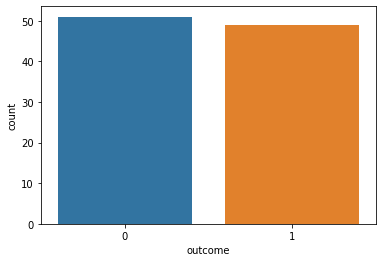

In [6]:
# Plot a countplot to see the distribution of outcome column
sns.countplot(x='outcome', data=procedures)

As we can see from above plot, we have failures than success

## Outcome rate depending on severity_of_condition

<AxesSubplot:xlabel='outcome', ylabel='count'>

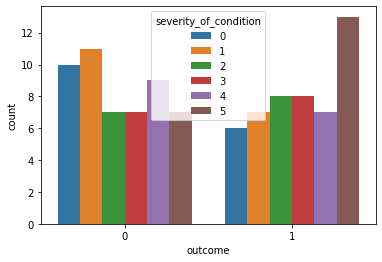

In [7]:
#Plot a countplot to check outcome rate depending on the severity
sns.countplot(x='outcome', hue='severity_of_condition', data=procedures)

<AxesSubplot:xlabel='outcome', ylabel='count'>

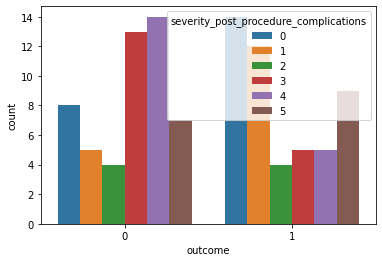

In [8]:
sns.countplot(x='outcome', hue='severity_post_procedure_complications', data=procedures)

## Converting Categorical Features

In [9]:
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   procedure_id                           100 non-null    int64 
 1   type_of_procedure                      100 non-null    object
 2   length_of_procedure_min                100 non-null    int64 
 3   severity_of_condition                  100 non-null    int64 
 4   severity_post_procedure_complications  100 non-null    int64 
 5   pain                                   100 non-null    int64 
 6   recurrence_of_original_condition       100 non-null    int64 
 7   age                                    100 non-null    int64 
 8   gender                                 100 non-null    object
 9   cost                                   100 non-null    int64 
 10  outcome                                100 non-null    int64 
dtypes: int64(9), object(

In [10]:
#dummying the gender column 
sex = pd.get_dummies(procedures['gender'])

#drop the rest of the columns which are not needed
procedures.drop(['gender','type_of_procedure'],axis=1,inplace=True)

In [11]:
#concatenate the new sex column to dataframe
procedures = pd.concat([procedures,sex],axis=1)

#Display top 5 rows
procedures.head(5)


,procedure_id,length_of_procedure_min,severity_of_condition,severity_post_procedure_complications,pain,recurrence_of_original_condition,age,cost,outcome,Female,Male
0,4,1079,4,5,2,0,11,65780,1,0,1
1,3,88,1,1,0,1,29,6317,1,1,0
2,6,332,5,2,2,1,1,46429,0,0,1
3,12,715,5,2,0,0,89,44601,1,0,1
4,12,137,5,4,5,1,17,80425,0,1,0


## Creating Training Data and Test Data
First, we need to divide our data into train and test data

In [12]:
# Split data into train, cross validation and test sets
from sklearn.model_selection import train_test_split
# Split the whole dataset for 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(procedures.drop('outcome', axis = 1), 
                                                    procedures.outcome,
                                                    test_size = 0.2,
                                                    random_state = 1)

# Split trainning set for final 60% train, 20% cross validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.25, random_state = 1)


In [13]:
# Check split result
X_train.shape, X_val.shape, X_test.shape

((60, 10), (20, 10), (20, 10))

In [14]:
features = ['severity_of_condition', 'severity_post_procedure_complications', 'recurrence_of_original_condition',
            'pain', 'length_of_procedure_min', 'age']

## Random forest regressor

In [15]:
# Train & predict with no parameter tweak
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train[features], y_train)
train_preds_rfr = rfr.predict(X_train[features])
val_preds_rfr = rfr.predict(X_val[features])
mse_train_rfr = mean_squared_error(y_train, train_preds_rfr)
mse_val_rfr = mean_squared_error(y_val, val_preds_rfr)
print('''The training mse of the random forest model is: {}, 
      The cross validation mse is: {}.'''.format(mse_train_rfr, mse_val_rfr))

The training mse of the random forest model is: 0.037228333333333335, 
      The cross validation mse is: 0.2566.


In [16]:
# Train & predict using random forest model and tweak parameters
mses_train_rfr = []
mses_val_rfr = []
for leaf_num in range(5, 20):
    rfr = RandomForestRegressor(min_samples_leaf=leaf_num, random_state=1)
    rfr.fit(X_train[features], y_train)
    train_preds_rfr = rfr.predict(X_train[features])
    val_preds_rfr = rfr.predict(X_val[features])
    mse_train_rfr = mean_squared_error(y_train, train_preds_rfr)
    mse_val_rfr = mean_squared_error(y_val, val_preds_rfr)
    mses_train_rfr.append(mse_train_rfr)
    mses_val_rfr.append(mse_val_rfr)
    print('''With a minimum leaf number of {}, the training mse of the dicision tree model is: {} | 
    The cross validation mse is: {}.'''.format(leaf_num, mse_train_rfr, mse_val_rfr), 
          '\n', '*'*30)

With a minimum leaf number of 5, the training mse of the dicision tree model is: 0.13061697370536607 | 
    The cross validation mse is: 0.23812759510458448. 
 ******************************
With a minimum leaf number of 6, the training mse of the dicision tree model is: 0.14075160685490676 | 
    The cross validation mse is: 0.24469427223709275. 
 ******************************
With a minimum leaf number of 7, the training mse of the dicision tree model is: 0.14813534321142152 | 
    The cross validation mse is: 0.2536816954117042. 
 ******************************
With a minimum leaf number of 8, the training mse of the dicision tree model is: 0.15552932325931088 | 
    The cross validation mse is: 0.25860113365581455. 
 ******************************
With a minimum leaf number of 9, the training mse of the dicision tree model is: 0.1623612511034546 | 
    The cross validation mse is: 0.2618792553188897. 
 ******************************
With a minimum leaf number of 10, the training m

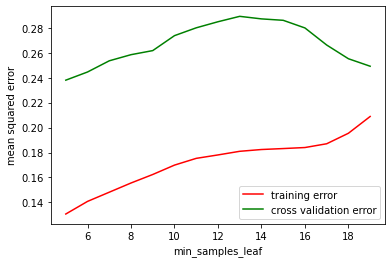

In [17]:
plt.plot(range(5, 20), mses_train_rfr, color = 'red', label = 'training error')
plt.plot(range(5, 20), mses_val_rfr, color = 'green', label = 'cross validation error')
plt.xlabel('min_samples_leaf')
plt.ylabel('mean squared error')
plt.legend(loc = 'lower right')

In [18]:
# Experiment with max_depth with bootstrap set to True
mses_train_d = []
mses_val_d = []
for depth in range(2,15): 
    rfr = RandomForestRegressor(max_depth = depth, min_samples_leaf=11, random_state=1, bootstrap = True)
    rfr.fit(X_train[features], y_train)
    train_preds_rfr = rfr.predict(X_train[features])
    val_preds_rfr = rfr.predict(X_val[features])
    mse_train_rfr = mean_squared_error(y_train, train_preds_rfr)
    mse_val_rfr = mean_squared_error(y_val, val_preds_rfr)
    mses_train_d.append(mse_train_rfr)
    mses_val_d.append(mse_val_rfr)
    print('''With max_depth {}, and a minimum leaf number of 11, the training mse of the dicistion tree model is: {} | 
    The cross validation mse is: {}.'''.format(depth, mse_train_rfr, mse_val_rfr), 
          '\n', '*'*30)

With max_depth 2, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 0.17532009900273937 | 
    The cross validation mse is: 0.2801833100258265. 
 ******************************
With max_depth 3, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 0.17532009900273937 | 
    The cross validation mse is: 0.2801833100258265. 
 ******************************
With max_depth 4, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 0.17532009900273937 | 
    The cross validation mse is: 0.2801833100258265. 
 ******************************
With max_depth 5, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 0.17532009900273937 | 
    The cross validation mse is: 0.2801833100258265. 
 ******************************
With max_depth 6, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 0.17532009900273937 | 
    The cross validation mse is: 0.280183

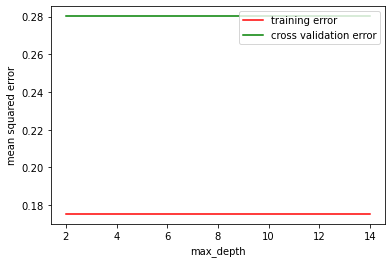

In [19]:
plt.plot(range(2, 15), mses_train_d, color = 'red', label = 'training error')
plt.plot(range(2, 15), mses_val_d, color = 'green', label = 'cross validation error')
plt.xlabel('max_depth')
plt.ylabel('mean squared error')
plt.legend(loc = 'upper right')

In [20]:
# Experiment with n_estimator with bootstrap set to True
# Train & predict using random forest model and tweak parameters
mses_train_e = []
mses_val_e = []
for n in range(100, 200, 10): # increment estimator by 10 from 100 to 200
    rfr = RandomForestRegressor(n_estimators = n, min_samples_leaf=11, max_depth = 8, random_state=1, bootstrap = True)
    rfr.fit(X_train[features], y_train)
    train_preds_rfr = rfr.predict(X_train[features])
    val_preds_rfr = rfr.predict(X_val[features])
    mse_train_rfr = mean_squared_error(y_train, train_preds_rfr)
    mse_val_rfr = mean_squared_error(y_val, val_preds_rfr)
    mses_train_e.append(mse_train_rfr)
    mses_val_e.append(mse_val_rfr)
    print('''With {} estimators, and a minimum leaf number of 8, the training mse of the dicistion tree model is: {} | 
    The cross validation mse is: {}.'''.format(n, mse_train_rfr, mse_val_rfr), 
          '\n', '*'*30)

With 100 estimators, and a minimum leaf number of 8, the training mse of the dicistion tree model is: 0.17532009900273937 | 
    The cross validation mse is: 0.2801833100258265. 
 ******************************
With 110 estimators, and a minimum leaf number of 8, the training mse of the dicistion tree model is: 0.17523049555014833 | 
    The cross validation mse is: 0.28106532589866734. 
 ******************************
With 120 estimators, and a minimum leaf number of 8, the training mse of the dicistion tree model is: 0.17499590442160076 | 
    The cross validation mse is: 0.2794752442385481. 
 ******************************
With 130 estimators, and a minimum leaf number of 8, the training mse of the dicistion tree model is: 0.17508015927013065 | 
    The cross validation mse is: 0.2787230141583509. 
 ******************************
With 140 estimators, and a minimum leaf number of 8, the training mse of the dicistion tree model is: 0.17523276207471306 | 
    The cross validation mse i

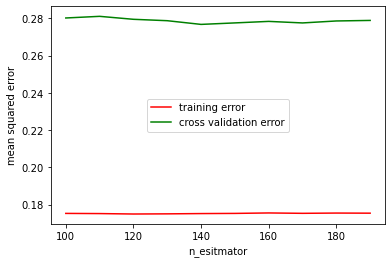

In [23]:
plt.plot(range(100, 200, 10), mses_train_e, color = 'red', label = 'training error')
plt.plot(range(100, 200, 10), mses_val_e, color = 'green', label = 'cross validation error')
plt.xlabel('n_esitmator')
plt.ylabel('mean squared error')
plt.legend(loc = 'center')

In [24]:
# Predict outcome
model = RandomForestRegressor(n_estimators = 180, min_samples_leaf=11, 
                              max_depth = 8, random_state=1, bootstrap = True)
model.fit(X_train[features], y_train)
predictions = model.predict(X_test[features])

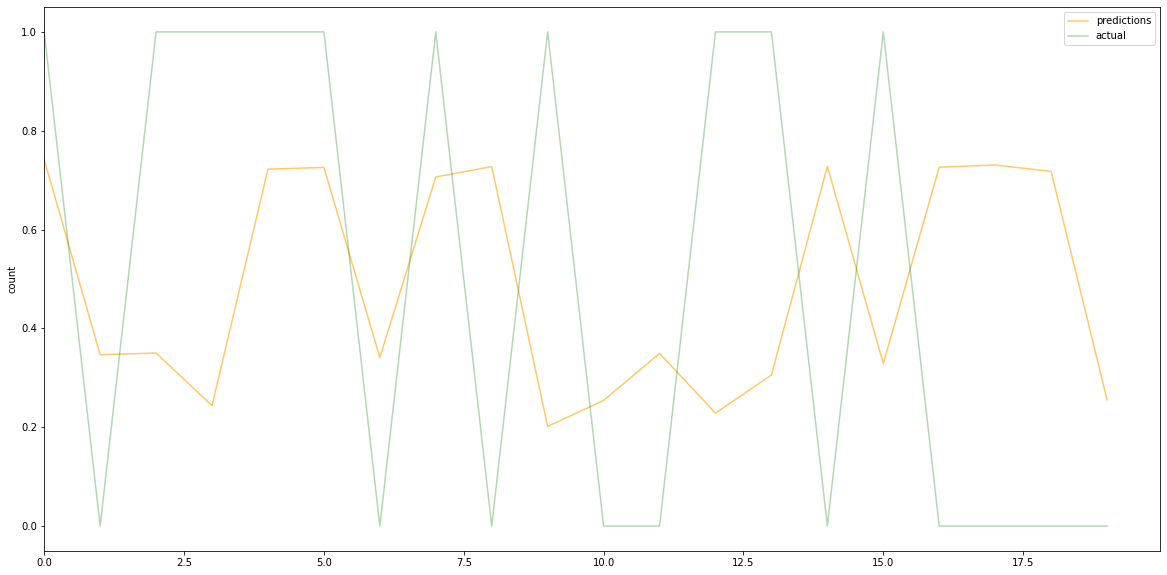

In [25]:
# Plot prediction vs actual values on part of the data
fig = plt.figure(figsize = (20,10))
plt.plot(range(len(X_test[:300])), predictions[:300], color = 'orange', label = 'predictions', alpha = 0.6)
plt.plot(range(len(X_test[:300])), y_test[:300], color = 'green', label = 'actual', alpha = 0.3)
plt.xlim(0, )
plt.ylabel('count')
plt.legend()